In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/NLP

/content/drive/.shortcut-targets-by-id/1plMjpYu4pyxTZsV33MlYa9xEP127qxWB/NLP_Project


In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [4]:
trainData = np.load('fin_t2_train.npy')
trainLabels = open('finalTrainLabels.labels', 'r').readlines()
testData = np.load('fin_t2_test.npy')
testLabels = open('finalTestLabels.labels', 'r').readlines()
valData = np.load('fin_t2_trial.npy')
valLabels = open('finalDevLabels.labels', 'r').readlines()

In [5]:
for i in tqdm(range(len(trainLabels))):
    trainLabels[i] = int(trainLabels[i])
for i in tqdm(range(len(testLabels))):
    testLabels[i] = int(testLabels[i])
for i in tqdm(range(len(valLabels))):
    valLabels[i] = int(valLabels[i])

100%|██████████| 10008/10008 [00:00<00:00, 1468688.79it/s]


In [6]:
trainLabels = np.array(trainLabels)
testLabels = np.array(testLabels)
valLabels = np.array(valLabels)

In [7]:
trainLabels = trainLabels.reshape((-1, ))
testLabels = testLabels.reshape((-1, ))
valLabels = valLabels.reshape((-1, ))

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [9]:
f1DictTrain = {}
precisionDictTrain = {}
recallDictTrain = {}
accDictTrain = {}
f1DictTest = {}
precisionDictTest = {}
recallDictTest = {}
accDictTest = {}
f1DictVal = {}
precisionDictVal = {}
recallDictVal = {}
accDictVal = {}

In [10]:
lossFn = ['hinge', 'log', 'modified_huber', 'perceptron']

In [11]:
for i in tqdm(range(len(lossFn))):
    fn = lossFn[i]
    sgd = SGDClassifier(learning_rate='optimal', verbose=0, max_iter=500, loss=fn)
    sgd.fit(trainData, trainLabels)
    trainPreds = sgd.predict(trainData)
    testPreds = sgd.predict(testData)
    valPreds = sgd.predict(valData)
    key = str(fn)
    f1DictTrain[key] = f1_score(trainLabels, trainPreds, average='weighted')
    precisionDictTrain[key] = precision_score(trainLabels, trainPreds, average='weighted')
    recallDictTrain[key] = recall_score(trainLabels, trainPreds, average='weighted')
    accDictTrain[key] = accuracy_score(trainLabels, trainPreds, normalize=True)
    f1DictTest[key] = f1_score(testLabels, testPreds, average='weighted')
    precisionDictTest[key] = precision_score(testLabels, testPreds, average='weighted')
    recallDictTest[key] = recall_score(testLabels, testPreds, average='weighted')
    accDictTest[key] = accuracy_score(testLabels, testPreds, normalize=True)
    f1DictVal[key] = f1_score(valLabels, valPreds, average='weighted')
    precisionDictVal[key] = precision_score(valLabels, valPreds, average='weighted')
    recallDictVal[key] = recall_score(valLabels, valPreds, average='weighted')
    accDictVal[key] = accuracy_score(valLabels, valPreds, normalize=True)

  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 25%|██▌       | 1/4 [01:13<03:41, 73.67s/it]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7

In [ ]:
precisionDictTest

{'hinge': 0.28384874190307235,
 'log': 0.29551828119487433,
 'modified_huber': 0.2842746458450894,
 'perceptron': 0.3170827323540076}

In [ ]:
precisionDictTrain

{'hinge': 0.4557516729681806,
 'log': 0.34492194522782404,
 'modified_huber': 0.35496387437599225,
 'perceptron': 0.3795330743518832}

In [ ]:
precisionDictVal

{'hinge': 0.2912349358519524,
 'log': 0.2821003446788099,
 'modified_huber': 0.29057007427309484,
 'perceptron': 0.25671191380925856}

In [12]:
print(precisionDictTrain)
print(precisionDictTest)
print(precisionDictVal)

{'hinge': 0.3651354458137074, 'log': 0.36633482607216533, 'modified_huber': 0.38683347511868954, 'perceptron': 0.5084267152754331}
{'hinge': 0.28260217339899574, 'log': 0.3074008798041305, 'modified_huber': 0.29009687329051376, 'perceptron': 0.4301825443081038}
{'hinge': 0.28017652395770476, 'log': 0.3001090246040508, 'modified_huber': 0.2747048778057561, 'perceptron': 0.3696200032357568}


In [13]:
print(recallDictTrain)
print(recallDictTest)
print(recallDictVal)

{'hinge': 0.3056777917476283, 'log': 0.28024631386444165, 'modified_huber': 0.32240827523145504, 'perceptron': 0.16424734255343468}
{'hinge': 0.2506, 'log': 0.2493, 'modified_huber': 0.2716, 'perceptron': 0.15055}
{'hinge': 0.2749800159872102, 'log': 0.2776778577138289, 'modified_huber': 0.28317346123101517, 'perceptron': 0.13798960831334933}


In [14]:
print(f1DictTrain)
print(f1DictTest)
print(f1DictVal)

{'hinge': 0.24374448303853077, 'log': 0.18913582172693405, 'modified_huber': 0.254965489088778, 'perceptron': 0.11461261152212751}
{'hinge': 0.20402008842690605, 'log': 0.17969260864081096, 'modified_huber': 0.23254480958704643, 'perceptron': 0.11092057740741033}
{'hinge': 0.2120137009114225, 'log': 0.18522655990101033, 'modified_huber': 0.23302878199076676, 'perceptron': 0.1113499334291308}


In [15]:
print(accDictTrain)
print(accDictTest)
print(accDictVal)

{'hinge': 0.3056777917476283, 'log': 0.28024631386444165, 'modified_huber': 0.32240827523145504, 'perceptron': 0.16424734255343468}
{'hinge': 0.2506, 'log': 0.2493, 'modified_huber': 0.2716, 'perceptron': 0.15055}
{'hinge': 0.2749800159872102, 'log': 0.2776778577138289, 'modified_huber': 0.28317346123101517, 'perceptron': 0.13798960831334933}


In [16]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

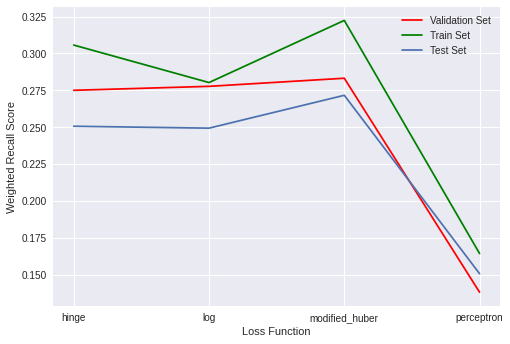

In [17]:
valList = [recallDictVal[i] for i in recallDictVal.keys()]
trainList = [recallDictTrain[i] for i in recallDictTrain.keys()]
testList = [recallDictTest[i] for i in recallDictTest.keys()]
plt.plot(lossFn, valList, label='Validation Set', c='red')
plt.plot(lossFn, trainList, label='Train Set', c='green')
plt.plot(lossFn, testList, label='Test Set')
plt.legend()
plt.ylabel('Weighted Recall Score')
plt.xlabel('Loss Function')
plt.show()

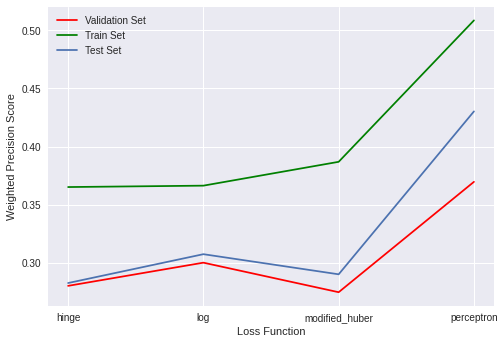

In [18]:
valList = [precisionDictVal[i] for i in precisionDictVal.keys()]
trainList = [precisionDictTrain[i] for i in precisionDictTrain.keys()]
testList = [precisionDictTest[i] for i in precisionDictTest.keys()]
plt.plot(lossFn, valList, label='Validation Set', c='red')
plt.plot(lossFn, trainList, label='Train Set', c='green')
plt.plot(lossFn, testList, label='Test Set')
plt.legend()
plt.ylabel('Weighted Precision Score')
plt.xlabel('Loss Function')
plt.show()

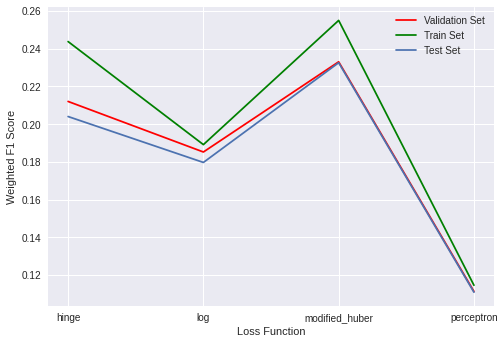

In [19]:
valList = [f1DictVal[i] for i in f1DictVal.keys()]
trainList = [f1DictTrain[i] for i in f1DictTrain.keys()]
testList = [f1DictTest[i] for i in f1DictTest.keys()]
plt.plot(lossFn, valList, label='Validation Set', c='red')
plt.plot(lossFn, trainList, label='Train Set', c='green')
plt.plot(lossFn, testList, label='Test Set')
plt.legend()
plt.ylabel('Weighted F1 Score')
plt.xlabel('Loss Function')
plt.show()

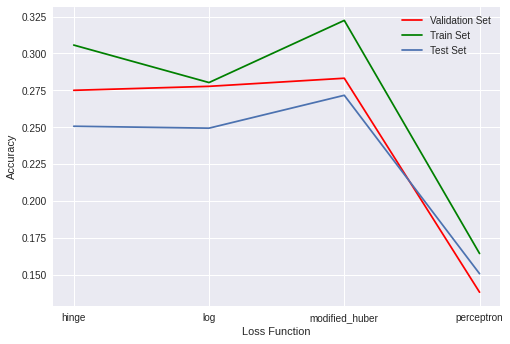

In [20]:
valList = [accDictVal[i] for i in accDictVal.keys()]
trainList = [accDictTrain[i] for i in accDictTrain.keys()]
testList = [accDictTest[i] for i in accDictTest.keys()]
plt.plot(lossFn, valList, label='Validation Set', c='red')
plt.plot(lossFn, trainList, label='Train Set', c='green')
plt.plot(lossFn, testList, label='Test Set')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Loss Function')
plt.show()

In [21]:
model = SGDClassifier(learning_rate='optimal', verbose=0, max_iter=500, loss='modified_huber')
model.fit(trainData, trainLabels)

SGDClassifier(loss='modified_huber', max_iter=500)

In [38]:
import pickle as pk
filename = 'WE_SGD_modified_huber'
pk.dump(model,open(filename,'wb'))

In [37]:
len(set(model.predict(valData[0:2000])))

18

In [ ]:
sgd = SGDClassifier(learning_rate='optimal', verbose=1, max_iter=500, loss='hinge')
sgd.fit(trainData, trainLabels)
print()
print('train', sgd.score(trainData, trainLabels))
print('test', sgd.score(testData, testLabels))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.20, NNZs: 2200, Bias: -1.541529, T: 69992, Avg. loss: 1.873198
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 17.04, NNZs: 2200, Bias: -1.476115, T: 139984, Avg. loss: 0.681917
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 14.68, NNZs: 2200, Bias: -1.310403, T: 209976, Avg. loss: 0.588035
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 12.97, NNZs: 2200, Bias: -1.171124, T: 279968, Avg. loss: 0.546690
Total training time: 1.71 seconds.
-- Epoch 5
Norm: 11.79, NNZs: 2200, Bias: -0.976790, T: 349960, Avg. loss: 0.522578
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 10.95, NNZs: 2200, Bias: -1.092662, T: 419952, Avg. loss: 0.505727
Total training time: 2.58 seconds.
-- Epoch 7
Norm: 10.21, NNZs: 2200, Bias: -1.134053, T: 489944, Avg. loss: 0.495211
Total training time: 3.01 seconds.
-- Epoch 8
Norm: 9.63, NNZs: 2200, Bias: -1.144597, T: 559936, Avg. loss: 0.486548
Total training time: 3.42 seconds.
-- Epoch 9
Norm: 9.10, NNZs: 2200, Bias: -1.089527

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.6min finished


train 0.22744027888901588
test 0.1839


In [ ]:
sgd = SGDClassifier(learning_rate='optimal', verbose=1, max_iter=500, loss='log')
sgd.fit(trainData, trainLabels)
print()
print('train', sgd.score(trainData, trainLabels))
print('test', sgd.score(testData, testLabels))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 18.65, NNZs: 2200, Bias: -1.096029, T: 69992, Avg. loss: 1.522071
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 15.88, NNZs: 2200, Bias: -1.391769, T: 139984, Avg. loss: 0.545786
Total training time: 1.29 seconds.
-- Epoch 3
Norm: 15.10, NNZs: 2200, Bias: -1.259021, T: 209976, Avg. loss: 0.514796
Total training time: 1.88 seconds.
-- Epoch 4
Norm: 14.83, NNZs: 2200, Bias: -1.335612, T: 279968, Avg. loss: 0.502522
Total training time: 2.48 seconds.
-- Epoch 5
Norm: 14.62, NNZs: 2200, Bias: -1.376117, T: 349960, Avg. loss: 0.497150
Total training time: 3.09 seconds.
-- Epoch 6
Norm: 14.49, NNZs: 2200, Bias: -1.363685, T: 419952, Avg. loss: 0.493322
Total training time: 3.69 seconds.
-- Epoch 7
Norm: 14.40, NNZs: 2200, Bias: -1.297254, T: 489944, Avg. loss: 0.490406
Total training time: 4.30 seconds.
-- Epoch 8
Norm: 14.33, NNZs: 2200, Bias: -1.378073, T: 559936, Avg. loss: 0.489073
Total training time: 4.91 seconds.
-- Epoch 9
Norm: 14.26, NNZs: 2200, Bias: -1.3979

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.1min finished


train 0.2997342553434678
test 0.20705


In [ ]:
sgd = SGDClassifier(learning_rate='optimal', verbose=1, max_iter=500, loss='modified_huber')
sgd.fit(trainData, trainLabels)
print()
print('train', sgd.score(trainData, trainLabels))
print('test', sgd.score(testData, testLabels))

-- Epoch 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Norm: 71.49, NNZs: 2200, Bias: -2.204180, T: 69992, Avg. loss: 22.347299
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 43.40, NNZs: 2200, Bias: -0.597212, T: 139984, Avg. loss: 3.365867
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 32.61, NNZs: 2200, Bias: -0.436626, T: 209976, Avg. loss: 1.953021
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 25.79, NNZs: 2200, Bias: -0.561653, T: 279968, Avg. loss: 1.435969
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 21.86, NNZs: 2200, Bias: -0.649648, T: 349960, Avg. loss: 1.167442
Total training time: 2.15 seconds.
-- Epoch 6
Norm: 19.31, NNZs: 2200, Bias: -0.743722, T: 419952, Avg. loss: 1.016058
Total training time: 2.62 seconds.
-- Epoch 7
Norm: 17.51, NNZs: 2200, Bias: -0.599149, T: 489944, Avg. loss: 0.929228
Total training time: 3.11 seconds.
-- Epoch 8
Norm: 16.03, NNZs: 2200, Bias: -0.540107, T: 559936, Avg. loss: 0.866937
Total training time: 3.61 seconds.
-- Epoch 9
Norm: 15.08, NNZs: 2200, Bias: -0.773580, T: 629

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.1min finished


train 0.3196936792776317
test 0.2817


In [ ]:
sgd = SGDClassifier(learning_rate='optimal', verbose=1, max_iter=500, loss='perceptron')
sgd.fit(trainData, trainLabels)
print()
print('train', sgd.score(trainData, trainLabels))
print('test', sgd.score(testData, testLabels))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 17.62, NNZs: 2200, Bias: -0.413494, T: 69992, Avg. loss: 1.394154
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 11.08, NNZs: 2200, Bias: -0.216417, T: 139984, Avg. loss: 0.221391
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 8.29, NNZs: 2200, Bias: -0.073274, T: 209976, Avg. loss: 0.129970
Total training time: 1.14 seconds.
-- Epoch 4
Norm: 6.67, NNZs: 2200, Bias: -0.127861, T: 279968, Avg. loss: 0.092575
Total training time: 1.51 seconds.
-- Epoch 5
Norm: 5.61, NNZs: 2200, Bias: -0.010430, T: 349960, Avg. loss: 0.071787
Total training time: 1.88 seconds.
-- Epoch 6
Norm: 4.79, NNZs: 2200, Bias: -0.067072, T: 419952, Avg. loss: 0.058828
Total training time: 2.25 seconds.
-- Epoch 7
Norm: 4.20, NNZs: 2200, Bias: -0.025956, T: 489944, Avg. loss: 0.049706
Total training time: 2.62 seconds.
-- Epoch 8
Norm: 3.79, NNZs: 2200, Bias: -0.100935, T: 559936, Avg. loss: 0.043174
Total training time: 3.00 seconds.
-- Epoch 9
Norm: 3.44, NNZs: 2200, Bias: -0.015391, T: 

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.5min finished


train 0.13803006057835182
test 0.12175
